## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Load the Data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')
# Checking the head, shape and info
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
# Check null values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Categorical features
columns = (data.dtypes == 'object')
object_cols = list(columns[columns].index)
print('Categorical variables:')
print(object_cols)

Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [7]:
# The feature "TotalCharges" is in the wrong format, let's solve this
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [8]:
# Statistical resume
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [9]:
# More imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

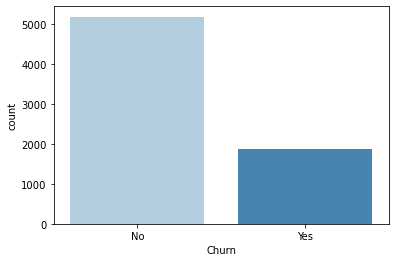

In [10]:
# Let's explore the data
sns.countplot(x='Churn',data = data,palette = 'Blues') # Unbalanced data (let's handle this later)

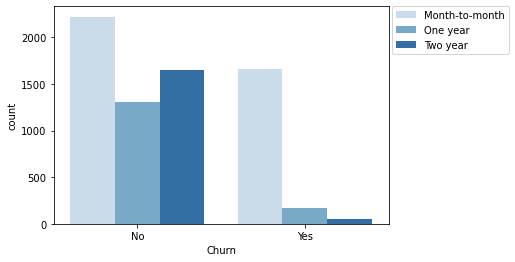

In [11]:
sns.countplot(x = 'Churn',data = data,hue = 'Contract',palette = 'Blues')
plt.legend(bbox_to_anchor = (1.01,1),loc = 2, borderaxespad = 0)

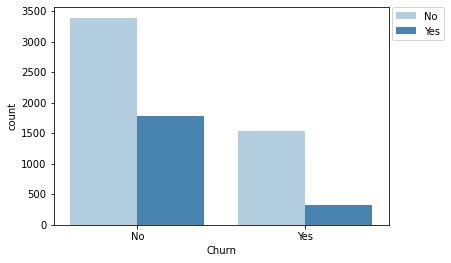

In [12]:
sns.countplot(x = 'Churn',data = data,hue = 'Dependents',palette = 'Blues')
plt.legend(bbox_to_anchor = (1.01,1),loc = 2, borderaxespad = 0)

<AxesSubplot:>

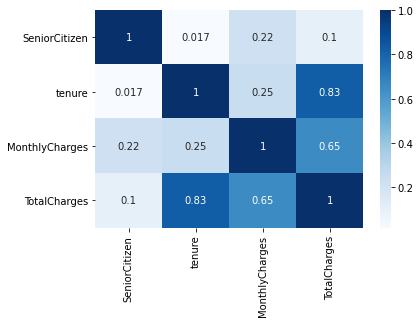

In [13]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

## Modeling the data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()

In [16]:
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


## Spliting and Creating a NN model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
X = data.drop('Churn', axis=1).values
y = data['Churn'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape, y_train.shape # Checking the shape

((4930, 19), (4930,))

### Let's use the Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, restore_best_weights=True, patience=20)

In [25]:
model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=9,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# This atribute help us to handle with unbalanced data
class_weight = {0:1.,
                1:1.5}

In [27]:
model.fit(x=X_train, 
          y=y_train,
          epochs=300,
          validation_data=(X_test, y_test), verbose=1,
          batch_size=128,
          callbacks=[early_stop],
          class_weight= class_weight
          )

Train on 4930 samples, validate on 2113 samples
Epoch 1/300
4930/4930 [==============================] - 1s 283us/sample - loss: 0.7839 - accuracy: 0.5675 - val_loss: 0.7062 - val_accuracy: 0.7283
Epoch 2/300
4930/4930 [==============================] - 0s 27us/sample - loss: 0.7251 - accuracy: 0.6807 - val_loss: 0.6870 - val_accuracy: 0.7283
Epoch 3/300
4930/4930 [==============================] - 0s 27us/sample - loss: 0.7013 - accuracy: 0.7055 - val_loss: 0.6692 - val_accuracy: 0.7288
Epoch 4/300
4930/4930 [==============================] - 0s 28us/sample - loss: 0.6815 - accuracy: 0.7233 - val_loss: 0.6405 - val_accuracy: 0.7397
Epoch 5/300
4930/4930 [==============================] - 0s 31us/sample - loss: 0.6691 - accuracy: 0.7298 - val_loss: 0.6189 - val_accuracy: 0.7657
Epoch 6/300
4930/4930 [==============================] - 0s 31us/sample - loss: 0.6653 - accuracy: 0.7343 - val_loss: 0.6037 - val_accuracy: 0.7780
Epoch 7/300
4930/4930 [==============================] - 0s 28u

Epoch 56/300
4930/4930 [==============================] - 0s 28us/sample - loss: 0.5555 - accuracy: 0.7921 - val_loss: 0.5231 - val_accuracy: 0.7989
Epoch 57/300
4930/4930 [==============================] - 0s 26us/sample - loss: 0.5490 - accuracy: 0.7919 - val_loss: 0.5220 - val_accuracy: 0.7993
Epoch 58/300
4930/4930 [==============================] - 0s 26us/sample - loss: 0.5544 - accuracy: 0.7858 - val_loss: 0.5221 - val_accuracy: 0.8003
Epoch 59/300
4930/4930 [==============================] - 0s 28us/sample - loss: 0.5497 - accuracy: 0.7844 - val_loss: 0.5209 - val_accuracy: 0.7989
Epoch 60/300
4930/4930 [==============================] - 0s 26us/sample - loss: 0.5469 - accuracy: 0.7909 - val_loss: 0.5214 - val_accuracy: 0.7965
Epoch 61/300
4930/4930 [==============================] - 0s 28us/sample - loss: 0.5549 - accuracy: 0.7901 - val_loss: 0.5199 - val_accuracy: 0.8003
Epoch 62/300
4930/4930 [==============================] - 0s 27us/sample - loss: 0.5471 - accuracy: 0.7890

Epoch 111/300
4930/4930 [==============================] - 0s 26us/sample - loss: 0.5439 - accuracy: 0.7947 - val_loss: 0.5187 - val_accuracy: 0.7965
Epoch 112/300
4930/4930 [==============================] - 0s 25us/sample - loss: 0.5377 - accuracy: 0.7968 - val_loss: 0.5188 - val_accuracy: 0.8017
Epoch 113/300
4930/4930 [==============================] - 0s 28us/sample - loss: 0.5382 - accuracy: 0.7961 - val_loss: 0.5204 - val_accuracy: 0.7979
Epoch 114/300
4930/4930 [==============================] - 0s 27us/sample - loss: 0.5297 - accuracy: 0.7980 - val_loss: 0.5202 - val_accuracy: 0.7998
Epoch 115/300
4930/4930 [==============================] - 0s 27us/sample - loss: 0.5298 - accuracy: 0.8008 - val_loss: 0.5201 - val_accuracy: 0.7998
Epoch 00115: early stopping


<AxesSubplot:>

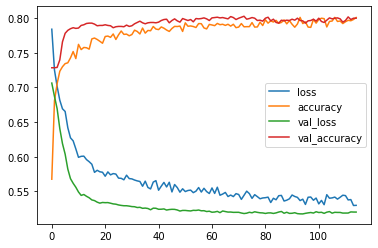

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# These plots show us a good fit of our model to the data

In [29]:
predictions = model.predict_classes(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1539
           1       0.62      0.65      0.63       574

    accuracy                           0.80      2113
   macro avg       0.74      0.75      0.75      2113
weighted avg       0.80      0.80      0.80      2113



In [32]:
accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Test Loss:',round(accuracy[0],3))
print('Test Accuracy:',round(accuracy[1],3))

Test Loss: 0.423
Test Accuracy: 0.796


In [ ]:
# Our model was good to explain loyal customers, and we improve the recall score > explain the target feature